In [1]:
# The train_test_split function is for splitting a single dataset for two different
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from yahoo_fin.stock_info import get_data
import pandas as pd

In [3]:
df= get_data("amzn", start_date="12/04/2010", end_date="12/04/2022", index_as_date = False, interval="1wk")
df

,date,open,high,low,close,adjclose,volume,ticker
0,2010-11-29,8.775000,8.820000,8.702500,8.784000,8.784000,98150000,AMZN
1,2010-12-06,8.776000,9.073500,8.668000,8.781000,8.781000,451584000,AMZN
2,2010-12-13,8.816500,8.950000,8.654500,8.879000,8.879000,446542000,AMZN
3,2010-12-20,8.963500,9.282500,8.902000,9.129500,9.129500,395652000,AMZN
4,2010-12-27,9.095000,9.227500,8.975500,9.000000,9.000000,255152000,AMZN
...,...,...,...,...,...,...,...,...
607,2022-07-18,115.000000,125.500000,113.150002,122.419998,122.419998,303077400,AMZN
608,2022-07-25,122.699997,137.649994,114.529999,134.949997,134.949997,409839500,AMZN
609,2022-08-01,134.960007,143.559998,133.509995,140.800003,140.800003,331832200,AMZN
610,2022-08-08,142.050003,144.600006,136.210007,143.550003,143.550003,239887600,AMZN


In [4]:
df= df.drop('ticker',axis=1)
df

,date,open,high,low,close,adjclose,volume
0,2010-11-29,8.775000,8.820000,8.702500,8.784000,8.784000,98150000
1,2010-12-06,8.776000,9.073500,8.668000,8.781000,8.781000,451584000
2,2010-12-13,8.816500,8.950000,8.654500,8.879000,8.879000,446542000
3,2010-12-20,8.963500,9.282500,8.902000,9.129500,9.129500,395652000
4,2010-12-27,9.095000,9.227500,8.975500,9.000000,9.000000,255152000
...,...,...,...,...,...,...,...
607,2022-07-18,115.000000,125.500000,113.150002,122.419998,122.419998,303077400
608,2022-07-25,122.699997,137.649994,114.529999,134.949997,134.949997,409839500
609,2022-08-01,134.960007,143.559998,133.509995,140.800003,140.800003,331832200
610,2022-08-08,142.050003,144.600006,136.210007,143.550003,143.550003,239887600


In [5]:
df = df[['date', 'close']]

df

,date,close
0,2010-11-29,8.784000
1,2010-12-06,8.781000
2,2010-12-13,8.879000
3,2010-12-20,9.129500
4,2010-12-27,9.000000
...,...,...
607,2022-07-18,122.419998
608,2022-07-25,134.949997
609,2022-08-01,140.800003
610,2022-08-08,143.550003


In [6]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [7]:
# Get number of trained days in dataset
df.shape

(612, 2)

In [8]:
df.index = df.pop('date')
df

,close
date,
2010-11-29,8.784000
2010-12-06,8.781000
2010-12-13,8.879000
2010-12-20,9.129500
2010-12-27,9.000000
...,...
2022-07-18,122.419998
2022-07-25,134.949997
2022-08-01,140.800003


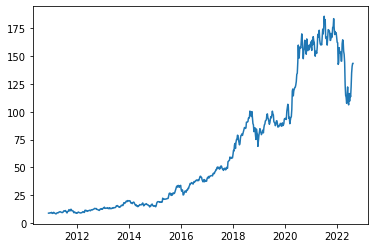

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['close'])

In [10]:
# Get the Close price
df = df[['close']]
df.head(10)

,close
date,
2010-11-29,8.7840
2010-12-06,8.7810
2010-12-13,8.8790
2010-12-20,9.1295
2010-12-27,9.0000
2011-01-03,9.2745
2011-01-10,9.4375
2011-01-17,8.8710
2011-01-24,8.5570


In [11]:
# creat a variable to Predict x days into the future
future_days = 10
# Create a new column target data - Predict values x days away from current price
df['Prediction'] = df[['close']].shift(-future_days)
df.head(10)

,close,Prediction
date,,
2010-11-29,8.7840,9.4625
2010-12-06,8.7810,9.3250
2010-12-13,8.8790,8.8620
2010-12-20,9.1295,8.5835
2010-12-27,9.0000,8.4035
2011-01-03,9.2745,8.0910
2011-01-10,9.4375,8.5490
2011-01-17,8.8710,9.0065
2011-01-24,8.5570,9.2355


In [12]:
# check the end shift
df.tail(10)

,close,Prediction
date,,
2022-06-13,106.220001,NaN
2022-06-20,116.459999,NaN
2022-06-27,109.559998,NaN
2022-07-04,115.540001,NaN
2022-07-11,113.550003,NaN
2022-07-18,122.419998,NaN
2022-07-25,134.949997,NaN
2022-08-01,140.800003,NaN
2022-08-08,143.550003,NaN


In [13]:
# Create a feature dataset and create a numpy array and remove the NaN days/rows 
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[  8.7840004 ]
 [  8.78100014]
 [  8.87899971]
 [  9.12950039]
 [  9.        ]
 [  9.27449989]
 [  9.4375    ]
 [  8.87100029]
 [  8.55700016]
 [  8.79650021]
 [  9.46249962]
 [  9.32499981]
 [  8.86200047]
 [  8.58349991]
 [  8.4034996 ]
 [  8.0909996 ]
 [  8.54899979]
 [  9.00650024]
 [  9.23550034]
 [  9.00049973]
 [  9.29450035]
 [  9.79049969]
 [  9.88000011]
 [ 10.12800026]
 [  9.93249989]
 [  9.70650005]
 [  9.41600037]
 [  9.32649994]
 [  9.31849957]
 [  9.62749958]
 [ 10.4744997 ]
 [ 10.91399956]
 [ 10.64350033]
 [ 10.82600021]
 [ 11.1260004 ]
 [ 10.13500023]
 [ 10.11499977]
 [  8.94649982]
 [  9.96350002]
 [ 10.5       ]
 [ 10.56949997]
 [ 11.96500015]
 [ 11.18050003]
 [ 10.8114996 ]
 [ 11.23700047]
 [ 12.33549976]
 [ 11.73900032]
 [ 10.86600018]
 [ 10.82400036]
 [ 10.86950016]
 [  9.85700035]
 [  9.11999989]
 [  9.80150032]
 [  9.65149975]
 [  9.06299973]
 [  8.86400032]
 [  8.65499973]
 [  9.13049984]
 [  8.92099953]
 [  9.54650021]
 [  9.76850033]
 [  9.38399982]
 [  9.27

C:\Users\wala\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [14]:
# Create target set
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[  9.46249962   9.32499981   8.86200047   8.58349991   8.4034996
   8.0909996    8.54899979   9.00650024   9.23550034   9.00049973
   9.29450035   9.79049969   9.88000011  10.12800026   9.93249989
   9.70650005   9.41600037   9.32649994   9.31849957   9.62749958
  10.4744997   10.91399956  10.64350033  10.82600021  11.1260004
  10.13500023  10.11499977   8.94649982   9.96350002  10.5
  10.56949997  11.96500015  11.18050003  10.8114996   11.23700047
  12.33549976  11.73900032  10.86600018  10.82400036  10.86950016
   9.85700035   9.11999989   9.80150032   9.65149975   9.06299973
   8.86400032   8.65499973   9.13049984   8.92099953   9.54650021
   9.76850033   9.38399982   9.27700043   9.125        8.95650005
   8.96500015   9.2159996    9.25249958   9.75199986  10.12549973
   9.71949959   9.42300034   9.4989996   11.34249973  11.19950008
  11.38399982  10.69250011  10.64449978  10.41100025  10.92399979
  10.91749954  11.1079998   11.41749954  11.25249958  10.91950035
  11.41450024  11.8

In [15]:
# train and test ratio is 75% traing and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [16]:
# Create models
# Decision Tree Regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
# Linear Regression Model
linr = LinearRegression().fit(x_train, y_train)

In [17]:
# Get x rows on future data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\wala\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[154.460495  ],
       [151.70649719],
       [144.3500061 ],
       [124.28150177],
       [114.77249908],
       [113.05500031],
       [107.59100342],
       [115.14649963],
       [122.34999847],
       [109.65000153]])

In [18]:
# Prediction model for Decision Tree Regressor
tree_prediction = tree.predict(x_future)
print(x_future)

[[154.460495  ]
 [151.70649719]
 [144.3500061 ]
 [124.28150177]
 [114.77249908]
 [113.05500031]
 [107.59100342]
 [115.14649963]
 [122.34999847]
 [109.65000153]]


In [19]:
# Prediction model for Linear Regression model
linear_prediction = linr.predict(x_future)
print(x_future)

[[154.460495  ]
 [151.70649719]
 [144.3500061 ]
 [124.28150177]
 [114.77249908]
 [113.05500031]
 [107.59100342]
 [115.14649963]
 [122.34999847]
 [109.65000153]]


C:\Users\wala\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


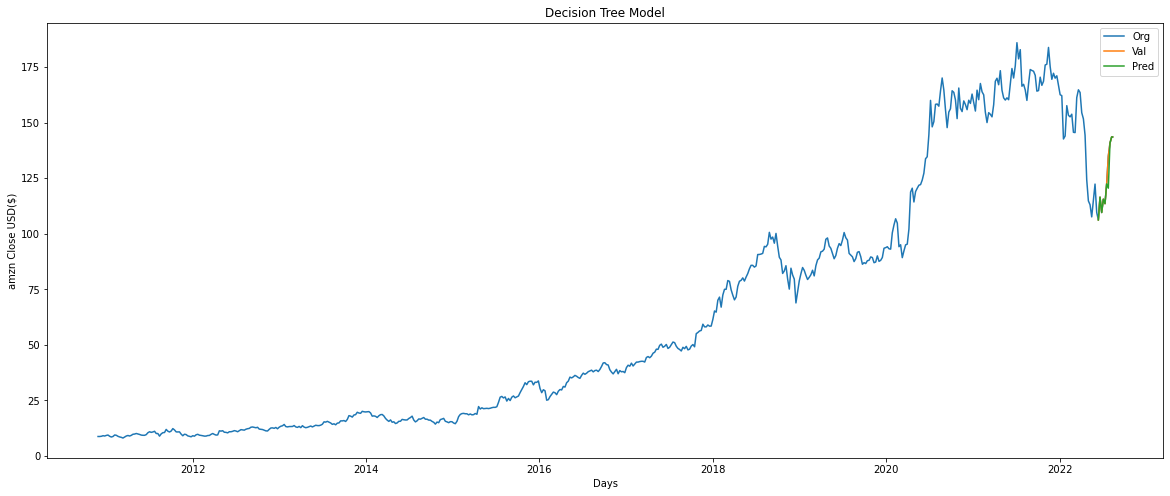

In [20]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (20, 8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('amzn Close USD($)')
plt.plot(df['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Org', 'Val', 'Pred'])
plt.show()

C:\Users\wala\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


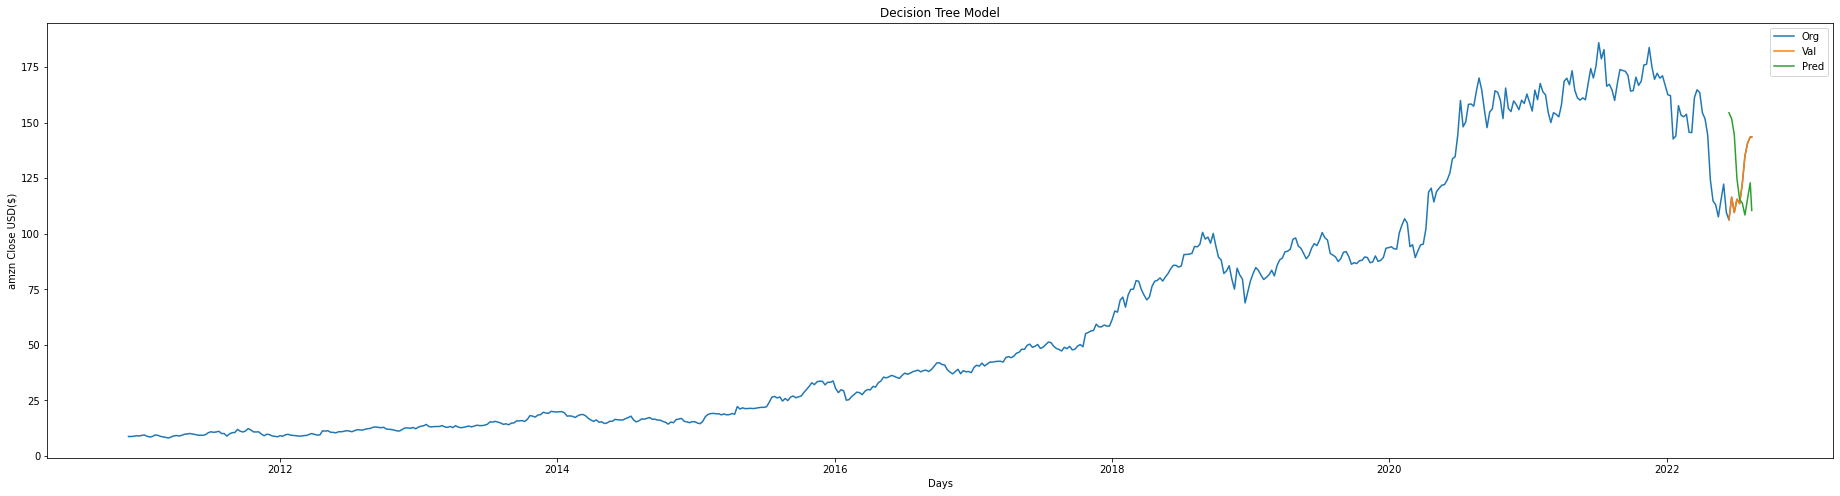

In [22]:
# Visualize the data 
predictions = linear_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (32, 8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('amzn Close USD($)')
plt.plot(df['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Org', 'Val', 'Pred'])
plt.show()